In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
sns.set()

In [2]:
# reading data 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Combining train and test data into one dataframe

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

all_data = pd.concat([train,test])
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [6]:
all_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.680672
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,0.466394
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [7]:
# Checking for null values. This is a kaggle's competition dataset , hence predictions for target variable is not 
# available. Thats why Survived has 418 missing values.

all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [8]:
# Filling missing values of Age with its median

all_data.Age = all_data.Age.fillna(all_data['Age'].median())

In [9]:
# Filling missing values of Fare with its mean

all_data.Fare = all_data.Fare.fillna(all_data['Fare'].mean())

In [10]:
# Filling missing values of Embarked with its mode

all_data.Embarked = all_data.Embarked.fillna(all_data['Embarked'].mode()[0])

In [11]:
all_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
# Filling missing values of cabin with string N

all_data.Cabin = all_data.Cabin.fillna('N')

In [13]:
# No missing values now.

all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
train_test       0
dtype: int64

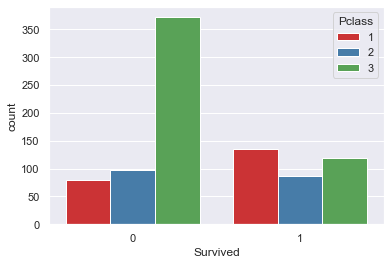

In [14]:
# People with Pclass 1 have higher survival rate than people with Pclass 3. Hence Pclass will be important factor in
# classification

sns.countplot( x='Survived', data=train, hue="Pclass", palette="Set1");

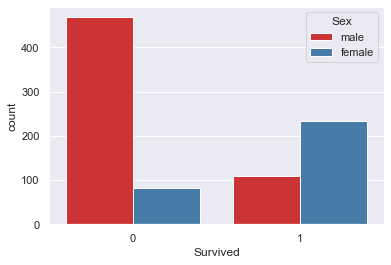

In [15]:
# Females have higher survival rate than males. Hence Sex will be important factor in classification

sns.countplot( x='Survived', data=train, hue="Sex", palette="Set1");

In [18]:
# Categorizing age into 5 ranges.

train['Age_Group'] = pd.cut(train['Age'], 5)


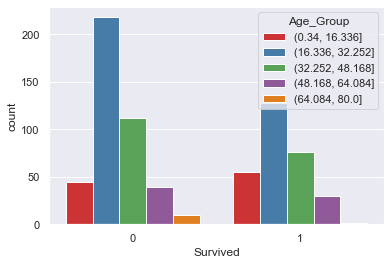

In [19]:
# Childrens have a high survival rate

sns.countplot( x='Survived', data=train, hue="Age_Group", palette="Set1");

In [20]:
# Categorizing age on basis of above visualization

all_data.loc[ all_data['Age'] <= 16, 'Age'] = 0
all_data.loc[(all_data['Age'] > 16) & (all_data['Age'] <= 32), 'Age'] = 1
all_data.loc[(all_data['Age'] > 32) & (all_data['Age'] <= 48), 'Age'] = 2
all_data.loc[(all_data['Age'] > 48) & (all_data['Age'] <= 64), 'Age'] = 3
all_data.loc[ all_data['Age'] > 64, 'Age'] = 4

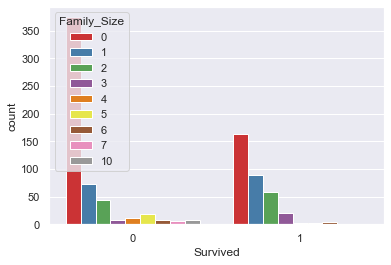

In [21]:
# Creating variable Family Size

train['Family_Size'] = train['Parch'] + train['SibSp']
sns.countplot( x='Survived', data=train, hue="Family_Size", palette="Set1");

In [22]:
all_data['Family_Size'] = all_data['Parch'] + all_data['SibSp']


In [23]:
# Categorizing people on basis of their family size

all_data['Size'] = np.NaN

all_data.loc[ all_data['Family_Size'] == 0, 'Size'] = 0
all_data.loc[(all_data['Family_Size'] > 0) & (all_data['Family_Size'] <= 3), 'Size'] = 1
all_data.loc[ all_data['Family_Size'] > 3, 'Size'] = 2

<AxesSubplot:xlabel='Survived', ylabel='count'>

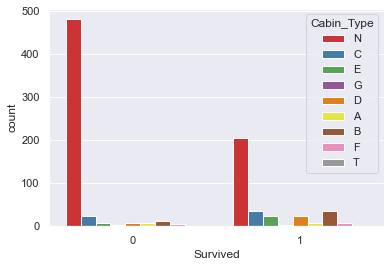

In [25]:
# Here i have taken first letter from each person's Cabin. Cabin had many missing values and could have been dropped.

train['Cabin_Type'] = np.NaN
train.Cabin = train.Cabin.fillna('N')
train['Cabin_Type'] = train.Cabin.apply(lambda x: x[0])
sns.countplot( x='Survived', data=train, hue="Cabin_Type", palette="Set1")

In [26]:
all_data['Cabin_Type'] = np.NaN
all_data['Cabin_Type'] = all_data.Cabin.apply(lambda x: x[0])

In [27]:
# Mapping values for categorical variables

all_data.Cabin_Type = all_data.Cabin_Type.map({'N':0,'C':1,'E':2,'G':3,'D':4,'A':5,'B':6,'F':7,'T':8})
all_data.Sex = all_data.Sex.map({'male':0,'female':1})
all_data.Embarked = all_data.Embarked.map({'S':0,'C':1,'Q':2})

In [29]:
# Dividing fare into 4 categories

train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'],
            as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [30]:
all_data['Fare_Type'] = np.NaN

all_data.loc[ all_data['Fare'] <= 7.91, 'Fare_Type'] = 0
all_data.loc[(all_data['Fare'] > 7.91) & (all_data['Fare'] <= 14.454), 'Fare_Type'] = 1
all_data.loc[(all_data['Fare'] > 14.454) & (all_data['Fare'] <= 31), 'Fare_Type']   = 2
all_data.loc[ all_data['Fare'] > 31, 'Fare_Type'] = 3


In [31]:
# Just some typecasting

all_data['Fare_Type'] = all_data['Fare_Type'].astype(int)
all_data['Age'] = all_data['Age'].astype(int)
all_data['Size'] = all_data['Size'].astype(int)


In [32]:
# Dropping all unnecessary columns

all_data = all_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Family_Size','Cabin','Fare'],axis=1)


In [48]:
# Checking for correlation

all_data.drop(['train_test'],axis=1).corr()

,Survived,Pclass,Sex,Age,Embarked,Size,Cabin_Type,Fare_Type
Survived,1.000000,-0.338481,0.543351,-0.043800,0.106811,0.108631,0.270310,0.295875
Pclass,-0.338481,1.000000,-0.124617,-0.391521,0.038875,-0.067487,-0.537378,-0.650150
Sex,0.543351,-0.124617,1.000000,-0.042903,0.120423,0.258533,0.103469,0.234203
Age,-0.043800,-0.391521,-0.042903,1.000000,-0.022260,-0.119625,0.202836,0.149402
Embarked,0.106811,0.038875,0.120423,-0.022260,1.000000,-0.066792,0.018894,-0.119922
Size,0.108631,-0.067487,0.258533,-0.119625,-0.066792,1.000000,0.067656,0.548629
Cabin_Type,0.270310,-0.537378,0.103469,0.202836,0.018894,0.067656,1.000000,0.361897
Fare_Type,0.295875,-0.650150,0.234203,0.149402,-0.119922,0.548629,0.361897,1.000000


In [34]:
# Splitting data again into test and train
 
X_train = all_data[all_data.train_test == 1].drop(['train_test','Survived'], axis =1)
X_test = all_data[all_data.train_test == 0].drop(['train_test','Survived'], axis =1)
y_train = all_data[all_data.train_test==1].Survived
y_train = y_train.astype(int)

In [35]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

82.15

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

78.9

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.97

In [38]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

79.24

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

89.0

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

89.0

In [41]:
# Various models and their prediction score

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_sgd,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.00
5,Decision Tree,89.00
1,KNN,85.97
0,Support Vector Machines,82.15
4,Stochastic Gradient Decent,79.24
2,Logistic Regression,78.90
